## IV Classification d'image : Galaxy Zoo

Objectif : avec Keras, résoudre au mieux le problème de classification des images de galaxies en 3 classes (rondes, à disque ou pas une galaxie), à l'aide de techniques non Deep Learning et de Deep Learning (transfer learning / CNN "maison").

### Le dataset : Galaxy Zoo

Une base d'images extraites du projet [Galaxy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/).

Les données sont téléchargeables ici : [galaxy zoo data](https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/data)

Combien y-a-t-il d'exemples ? Quelles sont les classes ? Sont-elles équilibrées ?

### Classification par modèles non Deep Learning (mardi après-midi)

Il n'y a pas que le Deep Learning pour faire de la classification d'images.

Inspection des données : commencez par visualiser une trentaine d'exemples d'images appartenant à des classes différentes pour en comprendre les particularités. En quoi ces images astronomiques différent-elles d'images de la vie courante ? Voyez-vous des différences exploitables entre les images de galaxies rondes et les galaxies à disque ?

**Faites un notebook qui contiendra les 3 parties suivantes :**
1. Pré-traitements pertinents pour le Galaxy zoo **ETAPE IMPORTANTE**
2. Classification avec une méthode ensembliste, par exemple XGBOOST, mesurez la performance
3. Classification par SVM ou k-NN pour classer le dataset mesurez la performance

Evaluez la performance de ces modèles, elle servira de référence (baseline) pour la suite.

Suggestions :
* Cherchez des stratégies pour réduire le nombre de dimensions et faciliter l'apprentissage d'un modèle
* A l'étape 1, on pourrait trouver les techniques suivantes (liste ni exhaustive ni prescriptive) :
  * traitements de l'image pour réduire sa taille tels que le rognage ou la réduction de résolution
  * traitements de l'image pour rendre plus le dataset plus facilement séparable, comme le changement d'espace de couleurs
  * application d'une réduction de dimensionnalité de type PCA ou autre
  * fabrication "créative" de features (exemple, le pixel au centre, des ratios d'intensité entre zones, etc.) pour améliorer les baselines
* A l'étape 1, essayez d'intercaler une PCA et comparez avec les résultats sans PCA

### Classification par Deep Learning

### Compression des images

Cherchez comment réduire la complexité du problème avec un mix des techniques déjà testées auparavant (exemples : rognage, redimensionnement, etc.).

A ce stade, il faudra s'être fixé les traitements en amont et leur implémentation (à la volée ou à partir de répertoires intermédiaires).

### Transfer learning


Le Transfer Learning consiste à reprendre en partie un modèle de CNN déjà entraîné. Concrétement et en général, on garde toute l'architecture de convolution telle quelle pour bénéficier de l'extraction de features déjà apprises et on remplace la partie classification (dernières couches du CNN) par des couches de classification à entraîner sur le dataset spécifique.

Le Transfer Learning passe donc par les étapes suivantes :

* Choix d'un modèle sur étagère (exemple VGG16, VGG19, Inception, Resnet50, etc.)

* Choix du périmètre de transfer learning en fonction de la taille du dataset (plus il est petit, moins on veut de paramètres à optimiser !)

* Ajout des couches de classification aux couches de convolution retenues

* Entraînement

Un bon tutoriel [ici](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)

### Data augmentation

Les datasets d'images coûtent chers à obtenir, surtout dans un domaine spécialisé. L'augmentation de données est une méthode importante pour améliorer l'entraînement des modèles de Deep Learning en leur fournissant des exemples réalistes fabriqués à partir des images originales.

Application au dataset Galaxy Zoo :

* Choisissez aléatoirement 9 images quelconques dans le dataset
* Générez des variantes avec les fonctions de Data Augmentation de Keras
    * Voir ImageDataGenerator()
    * Appliquez une translation aléatoire
    * Appliquez une rotation aléatoire
    * Appliquez feature standardization
    * Appliquez le ZCA whitening (des explications [ici](https://cbrnr.github.io/2018/12/17/whitening-pca-zca/))

**Note** : le Data Augmentation n'est pas une technique réservée aux problèmes de CV

#### Mise en oeuvre

Il y a 2 approches envisageables :
* Partir d'un réseau CNN pré-entraîné et appliquer du transfer Learning
* Définir son propre modèle CNN

Suggestions :
* Réfléchir à des stratégies d'amélioration des résultats : pré-traitement, feature engineering, combinaison de modèles/méthodes, etc.
* Définir et implémenter une architecture **simple** de CNN adaptée aux données réduites en termes de dimensions et de taille du dataset
* Explorer les temps de calcul en fonction de l'architecture et de l'étape de réduction des dimensions
* Entraîner le modèle (tester d'abord sur un sous-ensemble), évaluer avec une métriques adaptée
* Réfléchir à l'utilisation du data augmentation
* Implémenter le data augmentation, évaluer le gain
* Identifier les hyper-paramètres les plus prometteurs pour une optimisation du CNN
* Choisir une méthode d'optimisation des hyper-paramètres et l'appliquer à son modèle
* Chercher des modèles pré-entraînés qui pourraient servir pour ce problème de classification
* Réfléchir au périmètre d'architecture sur lequel appliquer le transfer learning
* Appliquer à l'entraînement d'un modèle, évaluer convergence et performance des prédictions
* Optimiser les hyper-paramètres pour le modèle provenant d'un modèle pré-entraîné

__Bonus :__
Dans un deuxième temps, on pourra chercher à identifier la présence d'une forme spiralée ou non lorsque la galaxie aura été identifiée comme appartenant à la classe 2, c'est-à-dire une galaxie à disque (voir [arbre de décision du problème](https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/overview/the-galaxy-zoo-decision-tree)).

### Un exemple de solution

Il s'agit du pipeline gagnant du challenge Galaxy Zoo : [sur github](https://github.com/benanne/kaggle-galaxies/blob/master/doc/documentation.pdf). Attention, le problème résolu dans ce cas était plus complexe que celui sur lequel vous avez travaillé. Néanmoins l'approche est très bien décrite et permet de s'inspirer.

https://towardsdatascience.com/galaxy-zoo-classification-with-keras-219184aff581


Julien - Formateur IA BordeauxAujourd’hui à 14:45
Une suggestion qui m'est venue en discutant avec l'un d'entre vous, une fois que vous avez récupéré les images, vous pourriez faire un petit code qui charge 25 images prises au hasard dans le répertoire et les affiche dans une mosaïque 5x5 pour voir à quoi elles ressemblent
ensuite faire pareil mais utilisant le fichier solutions pour en choisir au hasard 25 parmi les rondes et 25 parmi les autres, toujours pour voir à quoi elles ressemblent. Ce sont les colonnes Class1.1, Class1.2 et Class1.3 qui vous donnent le premier niveau de l'arbre de décision (1.1 = rondes, lisses, 1.2 = à disques et 1.3 = une étoile). Il faut faire un peu de Pandas pour ça. Je l'ai pas précisé, mais une galaxie c'est un gros paquet d'étoiles, hein ^^

In [37]:
import pandas as pd
alldf =pd.read_csv("training_solutions_rev1.csv")
alldf.shape

(61578, 38)

In [83]:

df = pd.read_csv("training_solutions_rev1.csv", usecols=[0,1,2,3])
df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161


In [39]:
faibleProb = df[(df['Class1.1'] < 0.4) & (df['Class1.2'] < 0.4)& (df['Class1.3'] < 0.4)]
faibleProb

,GalaxyID,Class1.1,Class1.2,Class1.3
61,100938,0.384686,0.238401,0.376913
5780,185816,0.360809,0.358149,0.281041
7035,203820,0.398567,0.386940,0.214493
10916,262021,0.293000,0.357000,0.350000
13073,293836,0.295000,0.341000,0.364000
16044,337325,0.383657,0.388412,0.227931
16899,349312,0.391242,0.382954,0.225804
22098,423206,0.385523,0.339743,0.274734
22291,425940,0.395395,0.209209,0.395395
22483,428697,0.383617,0.287934,0.328449


## Preparation

In [40]:
df_rounds = df[(df['Class1.1'] > df['Class1.2']) & (df['Class1.1'] > df['Class1.3'])] 
#df_rounds = df[(df['Class1.1'] > 0.51) ] 
df_disks =  df[(df['Class1.2'] > df['Class1.1']) & (df['Class1.2'] > df['Class1.3'])]
#df_disks =df[(df['Class1.2'] > 0.51)]

In [41]:
df_star = df[(df['Class1.3'] > df['Class1.2']) & (df['Class1.3'] > df['Class1.1'])]
#starDF = df[(df['Class1.3'] > 0.51)]
df_star.shape

(59, 4)

In [ ]:
#df_rounds.GalaxyID.values[0]

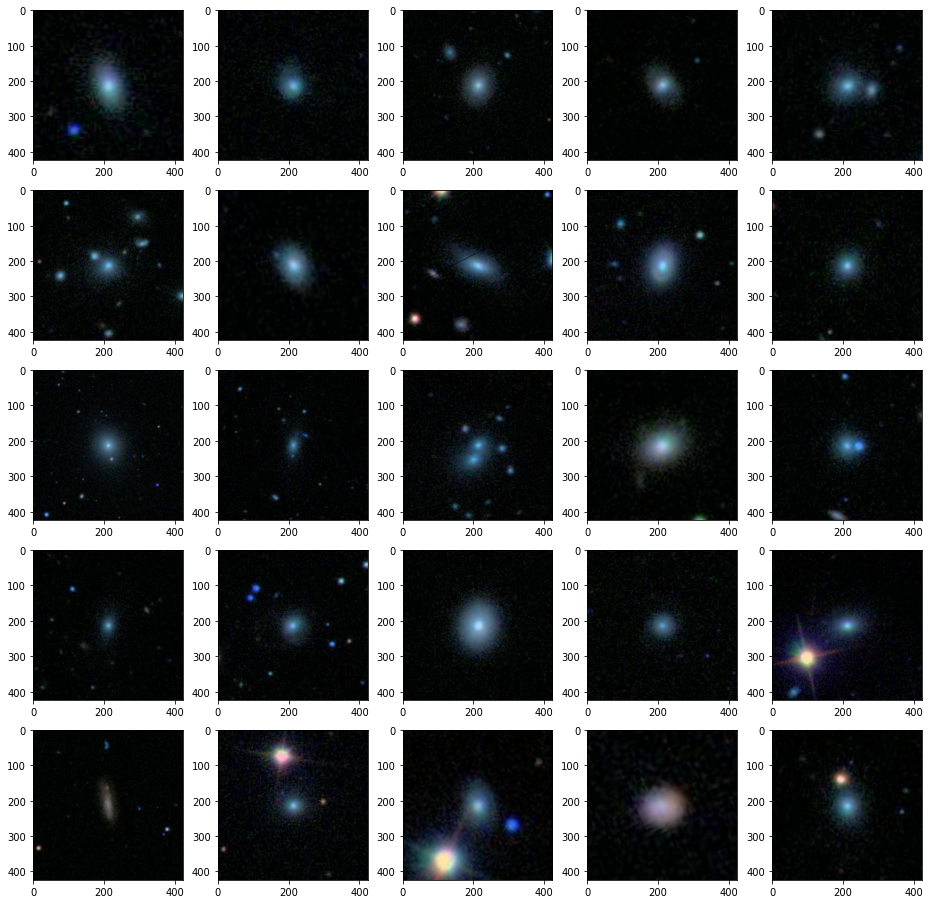

In [96]:
import matplotlib.pyplot as plt
import cv2
local_path = "images_training_rev1/"
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
   # filename = local_path + str(selected_idx[i]) + ".jpg"
    img = cv2.imread(local_path +str(df_rounds.GalaxyID.values[i])+".jpg")
    #print(local_path +str(df_rounds.GalaxyID.values[i])+".jpg")
    plt.imshow(img)

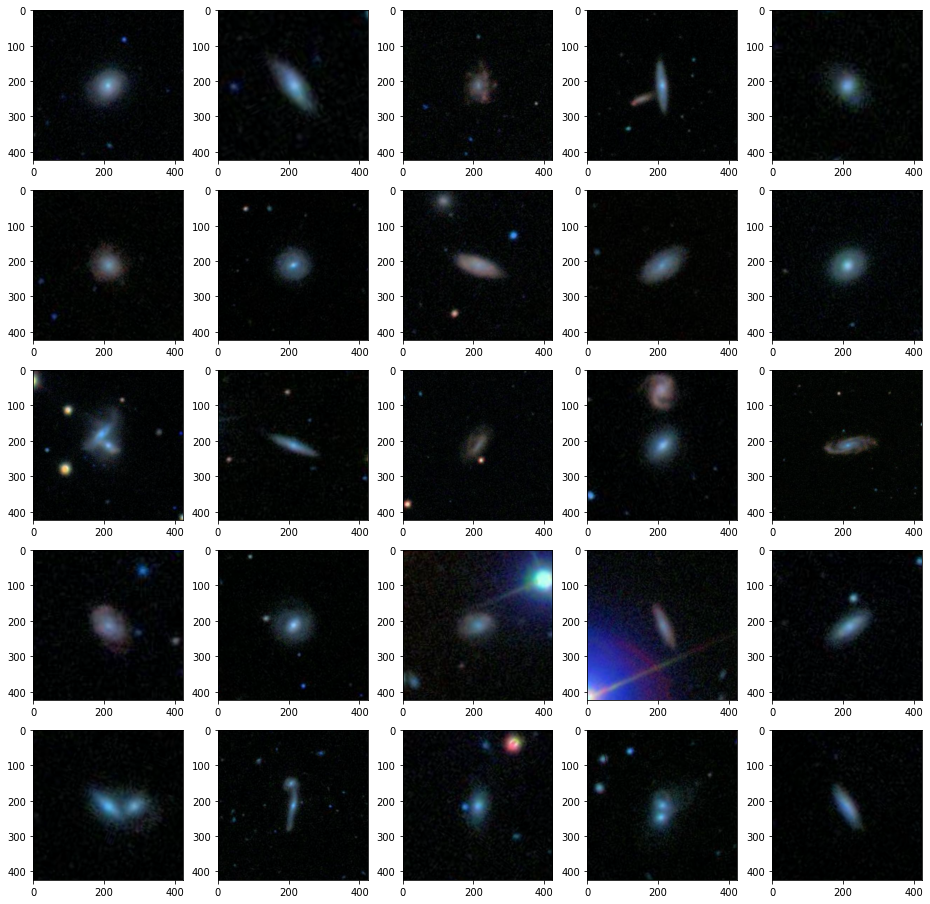

In [95]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
   # filename = local_path + str(selected_idx[i]) + ".jpg"
    img = cv2.imread(local_path +str(df_disks.GalaxyID.values[i])+".jpg")
    #print(local_path +str(df_disks.GalaxyID.values[i])+".jpg")
    plt.imshow(img)

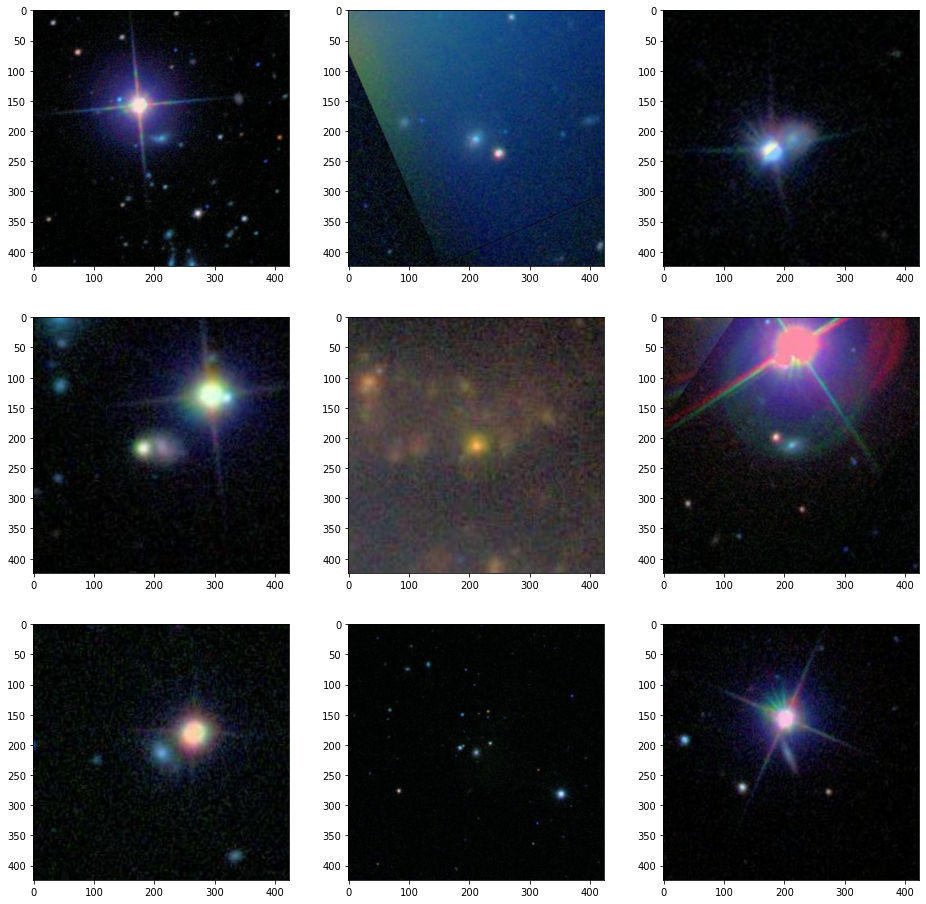

In [88]:
plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
   # filename = local_path + str(selected_idx[i]) + ".jpg"
    img = cv2.imread(local_path +str(df_star.GalaxyID.values[i])+".jpg")
    #print(local_path +str(df_rounds.GalaxyID.values[i])+".jpg")
    plt.imshow(img)

In [43]:
df_rounds.head(2)

,GalaxyID,Class1.1,Class1.2,Class1.3
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059


array([[<AxesSubplot:title={'center':'GalaxyID'}>,
        <AxesSubplot:title={'center':'Class1.1'}>],
       [<AxesSubplot:title={'center':'Class1.2'}>,
        <AxesSubplot:title={'center':'Class1.3'}>]], dtype=object)

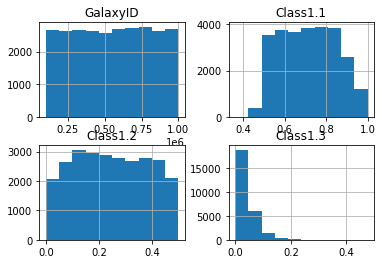

In [42]:
df_rounds.hist()

In [44]:
df_rounds = df_rounds.drop(columns=['Class1.1','Class1.2','Class1.3'])

In [45]:
df_rounds['type'] = '1'
df_rounds.head(2)

,GalaxyID,type
2,100053,1
3,100078,1


In [46]:
df_disks = df_disks.drop(columns=['Class1.1','Class1.2','Class1.3'])

In [47]:
df_disks['type'] = '2'
df_disks.head(2)

,GalaxyID,type
0,100008,2
1,100023,2


In [12]:
df_disks.shape

(34826, 2)

In [48]:
df_star = df_star.drop(columns=['Class1.1','Class1.2','Class1.3'])

In [49]:
df_star['type'] = '3'
df_star.head(2)

,GalaxyID,type
1791,126783,3
2376,135453,3


In [51]:
dfExtrait = pd.concat([df_rounds,df_disks,df_star])
dfExtrait.head(2)

,GalaxyID,type
2,100053,1
3,100078,1


In [57]:
from sklearn.model_selection import train_test_split

# Split the datafrane between train and test
train_df, validation_df = train_test_split(dfExtrait, test_size=0.2)

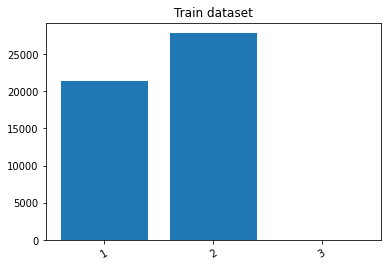

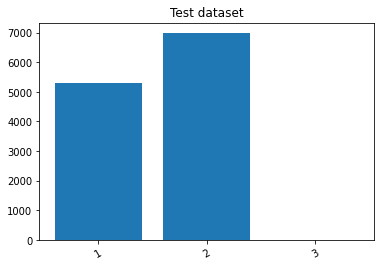

In [58]:
import numpy as np
#%% plot distribuition
def plot_info_set(df, name):
    countings = df.groupby("type").count().to_dict()["GalaxyID"]
    labels = list(countings.keys())
    values = list(countings.values())
    index = np.arange(len(labels))
    plt.bar(index, values)
    plt.title(name)
    plt.xticks(index, labels, rotation=30)
    plt.show()


plot_info_set(train_df, "Train dataset")
plot_info_set(validation_df, "Test dataset")

In [59]:
FILTERED_DATA_PATH = "data/filtered/"
DATASETS_PATH = "data/sets/"

In [61]:
DATA_PATH = "images_training_rev1/"

In [62]:
from string import Template
from os import path, mkdir, makedirs
from shutil import copy

def copy_files_of_set(df, dataset):
    print("Copying filtered files of " + dataset)
    if path.isdir(FILTERED_DATA_PATH + dataset) is False:
        makedirs(FILTERED_DATA_PATH + dataset, exist_ok=True)

    src_path = Template(DATA_PATH + "$name.jpg")
   #src_path = glob.glob('images_training_rev1/images_training_rev1/*.jpg')

    for index, image in df.iterrows():
        dest_path = FILTERED_DATA_PATH + dataset + "/" + image['type']
        source_img = src_path.substitute(name=image.GalaxyID)

        if path.isdir(dest_path) is False:
            mkdir(dest_path)

        copy(source_img, dest_path)



In [ ]:
#src_path = Template(DATA_PATH + "images_training_rev1/2.jpg")
#src_path.substitute(name=merged_dfs.GalaxyID)

In [63]:
copy_files_of_set(train_df, "training")
copy_files_of_set(validation_df, "validation")


Copying filtered files of training
Copying filtered files of validation



## Augment

In [64]:
ZOOM_FACTOR=1.6
DIMEN=70

In [65]:
import Augmentor
def resize_and_zoom(dataset):
    p = Augmentor.Pipeline(FILTERED_DATA_PATH + dataset, DATASETS_PATH + dataset)
    p.zoom(probability=1, max_factor=ZOOM_FACTOR, min_factor=ZOOM_FACTOR)
    p.resize(probability=1, width=DIMEN, height=DIMEN)
    p.process()
    
def augment_set(n, dataset = ""):
    p = Augmentor.Pipeline(FILTERED_DATA_PATH + "training/" + dataset, DATASETS_PATH + "training/" + dataset)
    p.zoom(probability=1, max_factor=ZOOM_FACTOR, min_factor=ZOOM_FACTOR)
    p.rotate_random_90(probability=0.2)
    p.flip_top_bottom(probability=0.5)
    p.flip_left_right(probability=0.5)
    p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.5)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.8)
    p.resize(probability=1, width=DIMEN, height=DIMEN)
    p.sample(n)

In [66]:
resize_and_zoom("training")
resize_and_zoom("validation")

augment_set(n = 15000)

Executing Pipeline:   0%|          | 0/49251 [00:00<?, ? Samples/s]

Initialised with 49251 image(s) found.
Output directory set to data/filtered/training/data/sets/training.

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6D28640B38>:   6%|▌         | 2988/49251 [02:45<2:24:00,  5.35 Samples/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6D0829D358>:  14%|█▍        | 7141/49251 [02:47<00:26, 1613.91 Samples/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6CE82D4128>:  25%|█

Initialised with 12313 image(s) found.
Output directory set to data/filtered/validation/data/sets/validation.

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6CA1CA0EF0>:  24%|██▍       | 3015/12313 [00:50<00:11, 810.36 Samples/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6CA9608BE0>:  58%|█████▊    | 7194/12313 [00:52<00:02, 2471.08 Samples/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6D5F2BBCF8>:  92%|████

Initialised with 49251 image(s) found.
Output directory set to data/filtered/training/data/sets/training/.

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6CE81C3BA8>:  22%|██▏       | 3336/15000 [01:14<00:07, 1604.99 Samples/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6D282947B8>:  50%|████▉     | 7495/15000 [01:16<00:03, 2287.76 Samples/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F6D080FE3C8>:  78%|███

<img src="treeData.png">

## Train

In [67]:


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Input

from keras.optimizers import  Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from os import path, mkdir



In [68]:
IMAGE_SIZE = (DIMEN, DIMEN)
INPUT_SHAPE = (DIMEN, DIMEN, 3)

BATCH_SIZE = 32
TRAIN_DIR = FILTERED_DATA_PATH + "training/" + DATASETS_PATH + "training"
VALIDATION_DIR = FILTERED_DATA_PATH + "validation/" +DATASETS_PATH + "validation"

In [69]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation("relu"))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))

# model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.015)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
# model.add(Dense(64))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.015)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 68, 68, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 66, 66, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 31, 31, 32)        0

In [71]:
datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
    TRAIN_DIR, class_mode="sparse", target_size=IMAGE_SIZE, batch_size=BATCH_SIZE
)

validation_generator = datagen.flow_from_directory(
    VALIDATION_DIR, class_mode="sparse", target_size=IMAGE_SIZE, batch_size=BATCH_SIZE
)

Found 64251 images belonging to 3 classes.
Found 12313 images belonging to 3 classes.


must delete data in data/filtered/training/data/sets/training$ to have 3 classes

In [72]:


if path.isdir("weights") is False:
    mkdir("weights")

trains_steps = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

model_checkpoint = ModelCheckpoint(
    "weights/weights{epoch:08d}.h5", save_weights_only=True, period=5
)

fit_result = model.fit_generator(
    train_generator,
    steps_per_epoch=trains_steps,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=40,
    callbacks=[model_checkpoint],
)

model.save_weights("weights/final_epoch.h5")



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
2007/2007 [==============================] - 366s 182ms/step - loss: 0.7252 - accuracy: 0.7699 - val_loss: 0.4475 - val_accuracy: 0.8249
Epoch 2/40
2007/2007 [==============================] - 379s 189ms/step - loss: 0.4658 - accuracy: 0.8191 - val_loss: 0.4262 - val_accuracy: 0.8403
Epoch 3/40
2007/2007 [==============================] - 369s 184ms/step - loss: 0.4468 - accuracy: 0.8266 - val_loss: 0.4210 - val_accuracy: 0.8322
Epoch 4/40
2007/2007 [==============================] - 372s 185ms/step - loss: 0.4322 - accuracy: 0.8314 - val_loss: 0.4252 - val_accuracy: 0.8318
Epoch 5/40
2007/2007 [==============================] - 376s 187ms/step - loss: 0.4251 - accuracy: 0.8345 - val_loss: 0.4098 - val_accuracy: 0.8385
Epoch 6/40
2007/2007 [==============================] - 362s 180ms/step - loss: 0.4183 - accuracy: 0.8372 - val_loss: 0.4255 - val_accuracy: 0.8286
Epoch 7/40
2007/2007 [==============

I could do only 15 epoch as we can see at the grafic below

In [ ]:
#fit_result.history

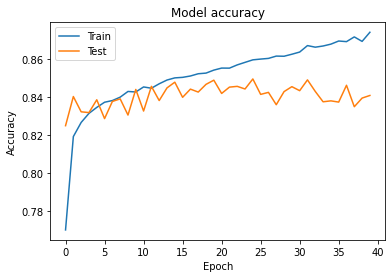

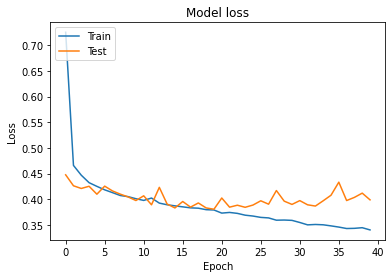

In [86]:
# Accuracy

plt.plot(fit_result.history["accuracy"])
plt.plot(fit_result.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Loss
plt.plot(fit_result.history["loss"])
plt.plot(fit_result.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

what could i do if I had more time(#maxout Using maxout here instead of regular dense layers with ReLUs helped to reduce overfitting a lot, compared to dense layers with 4096 linear filters. Using maxout in the convolutional part of the network as well proved too computationally intensive - like a winner de Kaggle) (I also could toy with a polar coordinate representation
)

https://www.kaggle.com/mgambati/teste-classifica-o-de-gal-xias

## Predict

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [79]:
prediction_generator = datagen.flow_from_directory(
    VALIDATION_DIR, class_mode="sparse", target_size=IMAGE_SIZE, batch_size=1, shuffle=False,
)

Found 12313 images belonging to 3 classes.


In [80]:
predict_result = model.predict_generator(prediction_generator, prediction_generator.n)
y_predicts = np.argmax(predict_result, axis=1)
classes_labels = list(prediction_generator.class_indices.keys())

Instructions for updating:
Please use Model.predict, which supports generators.


In [81]:
print(classification_report(prediction_generator.classes, y_predicts, target_names=classes_labels))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82      5309
           2       0.88      0.84      0.86      6992
           3       0.00      0.00      0.00        12

    accuracy                           0.84     12313
   macro avg       0.56      0.56      0.56     12313
weighted avg       0.84      0.84      0.84     12313



/home/ivanka/anaconda3/envs/tracking/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

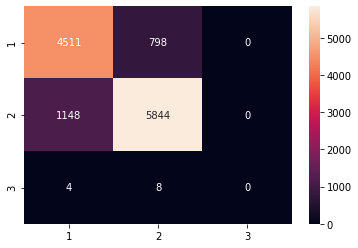

In [82]:
sns.heatmap(confusion_matrix(prediction_generator.classes, y_predicts), xticklabels=classes_labels, yticklabels=classes_labels, annot=True,fmt='.5g') 
